<a href="https://colab.research.google.com/github/ashika29/spoonshot-AI-hiring_challenge2020/blob/master/Spoonshot_AI_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Downloading our dataset

In [2]:
import os
path = '/content/drive/My Drive/Colab Notebooks/Spoonshot_Dataset'
print(os.path.join(path))

/content/drive/My Drive/Colab Notebooks/Spoonshot_Dataset


Import necessary libraries

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(path+os.path.join("/TRAIN.csv"))
print(df.shape)
print(df.head())
filter = df["ABSTRACT"] != ""
df = df[filter]
df = df.dropna()

(17000, 9)
                                               TITLE  ...                        labels
0  ChemGAN challenge for drug discovery: can AI r...  ...   Computer Science,Statistics
1  Hybrid graphene tunneling photoconductor with ...  ...                       Physics
2  Temperature Dependence of Magnetic Excitations...  ...                       Physics
3  A Las Vegas algorithm to solve the elliptic cu...  ...  Computer Science,Mathematics
4  Comparing simulations and test data of a radia...  ...                       Physics

[5 rows x 9 columns]


In [6]:
df.columns

Index(['TITLE', 'ABSTRACT', 'Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance', 'labels'],
      dtype='object')

In [7]:
import re
def preprocess_text(sentence):
  new_sentence = re.sub('[^a-zA-Z]', ' ', sentence)
  new_sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', new_sentence)
  # Removing multiple spaces
  new_sentence = re.sub(r'\s+', ' ', new_sentence)
  return new_sentence

In [17]:
print(f"{df['ABSTRACT'][1]}")
print(f"Computer Science: {df['Computer Science'][1]}")
print(f"Statistics: {df['Statistics'][1]}")
print(f"Physics: {df['Physics'][1]}")
print(f"Mathematics: {df['Mathematics'][1]}")
print(f"Quantitative Biology: {df['Quantitative Biology'][1]}")
print(f"Quantitative Finance: {df['Quantitative Finance'][1]}")

  Hybrid graphene photoconductor/phototransistor has achieved giant
photoresponsivity, but its response speed dramatically degrades as the expense
due to the long lifetime of trapped interfacial carriers. In this work, by
intercalating a large-area atomically thin MoS2 film into a hybrid graphene
photoconductor, we have developed a prototype tunneling photoconductor, which
exhibits a record-fast response (rising time ~17 ns) and a high responsivity
(~$3\times10^4$ A/W at 635 nm and 16.8 nW illumination) across the broad
spectral range. We demonstrate that the photo-excited carriers generated in
silicon are transferred into graphene through a tunneling process rather than
carrier drift. The atomically thin MoS2 film not only serves as tunneling layer
but also passivates surface states, which in combination delivers a superior
response speed (~3 order of magnitude improved than a device without MoS2
layer), while the responsivity remains high. This intriguing tunneling
photoconductor int

In [18]:
df_labels = df[['Computer Science','Physics','Mathematics','Statistics','Quantitative Biology','Quantitative Finance']]
df_labels.head()

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,0,0,1,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,1,0,1,0,0,0
4,0,1,0,0,0,0


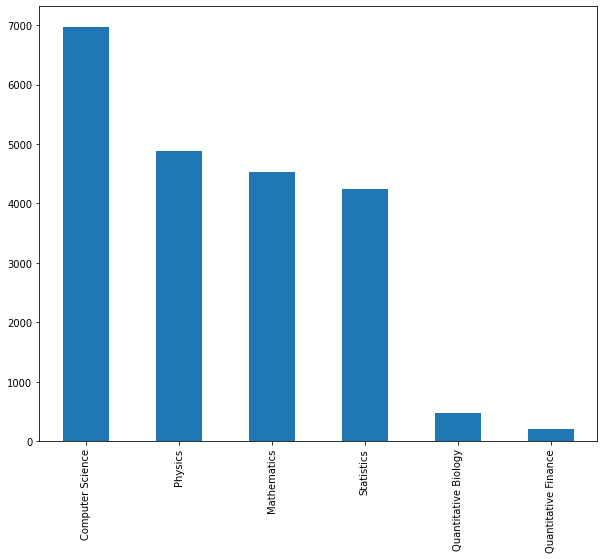

In [19]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
df_labels.sum(axis=0).plot.bar()

In [20]:
X = []
sentences = list(df["ABSTRACT"])
for sen in sentences:
    X.append(preprocess_text(sen))
y = df_labels.values
df_labels

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,0,0,1,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,1,0,1,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
16995,0,1,0,0,0,0
16996,0,1,0,0,0,0
16997,1,0,0,1,0,0
16998,0,0,1,0,0,0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, df_labels, test_size=0.20, random_state=42)
#y_train['Computer Science']

In [22]:
y_train

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
4679,1,0,0,0,0,0
2512,0,0,1,1,0,0
993,1,0,0,1,0,0
1327,1,0,0,1,0,0
4630,0,1,0,0,0,0
...,...,...,...,...,...,...
11284,0,1,0,0,0,0
11964,1,0,0,0,0,0
5390,0,0,1,0,0,0
860,1,0,0,0,0,0


In [24]:
y_test

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
10941,1,0,0,0,0,0
5250,1,0,0,0,0,0
10292,0,1,1,0,0,0
2266,1,0,1,0,0,0
6398,0,1,0,0,0,0
...,...,...,...,...,...,...
4706,0,1,0,0,0,0
8404,0,0,1,0,0,0
11114,0,1,0,0,0,0
7877,0,1,0,0,0,0


In [25]:
# First output
y1_train = y_train[['Computer Science']].values
y1_test =  y_test[['Computer Science']].values

# Second output
y2_train = y_train[['Physics']].values
y2_test =  y_test[['Physics']].values

# Third output
y3_train = y_train[['Mathematics']].values
y3_test =  y_test[['Mathematics']].values

# Fourth output
y4_train = y_train[['Statistics']].values
y4_test =  y_test[['Statistics']].values

# Fifth output
y5_train = y_train[['Quantitative Biology']].values
y5_test =  y_test[['Quantitative Biology']].values

# Sixth output
y6_train = y_train[['Quantitative Finance']].values
y6_test =  y_test[['Quantitative Finance']].values

In [26]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
vocab_size = len(tokenizer.word_index) + 1
maxlen = 200
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [27]:
from numpy import array
from numpy import asarray
from numpy import zeros
glove_file = open(path+os.path.join('/glove.6B.100d.txt'), encoding="utf8")
embeddings_dictionary = dict()
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [28]:
input_1 = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(input_1)
LSTM_Layer1 = LSTM(128)(embedding_layer)

output1 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output2 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output3 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output4 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output5 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output6 = Dense(1, activation='sigmoid')(LSTM_Layer1)

model = Model(inputs=input_1, outputs=[output1, output2, output3, output4, output5, output6])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
print(model.summary())

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 200, 100)     4047600     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 128)          117248      embedding[0][0]                  
__________________________________________________________________________________________________
dense (Dense)                   (None, 1)            129         lstm[0][0]                       
_______________________________________________________________________________________

In [29]:
history = model.fit(x=X_train, y=[y1_train, y2_train, y3_train, y4_train, y5_train, y6_train], batch_size=8192, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
2/2 [==============================] - 23s 11s/step - loss: 4.0779 - dense_loss: 0.6949 - dense_1_loss: 0.6900 - dense_2_loss: 0.6777 - dense_3_loss: 0.6903 - dense_4_loss: 0.6765 - dense_5_loss: 0.6485 - dense_acc: 0.5846 - dense_1_acc: 0.6881 - dense_2_acc: 0.6975 - dense_3_acc: 0.6138 - dense_4_acc: 0.7603 - dense_5_acc: 0.9869 - val_loss: 3.9596 - val_dense_loss: 0.6935 - val_dense_1_loss: 0.6873 - val_dense_2_loss: 0.6619 - val_dense_3_loss: 0.6810 - val_dense_4_loss: 0.6263 - val_dense_5_loss: 0.6095 - val_dense_acc: 0.5875 - val_dense_1_acc: 0.7048 - val_dense_2_acc: 0.7423 - val_dense_3_acc: 0.7217 - val_dense_4_acc: 0.9688 - val_dense_5_acc: 0.9882
Epoch 2/10
2/2 [==============================] - 13s 6s/step - loss: 3.9491 - dense_loss: 0.6935 - dense_1_loss: 0.6860 - dense_2_loss: 0.6584 - dense_3_loss: 0.6795 - dense_4_loss: 0.6249 - dense_5_loss: 0.6069 - dense_acc: 0.5886 - dense_1_acc: 0.7145 - dense_2_acc: 0.7323 - dense_3_acc: 0.7233 - dense_4_acc: 0.9733 - 

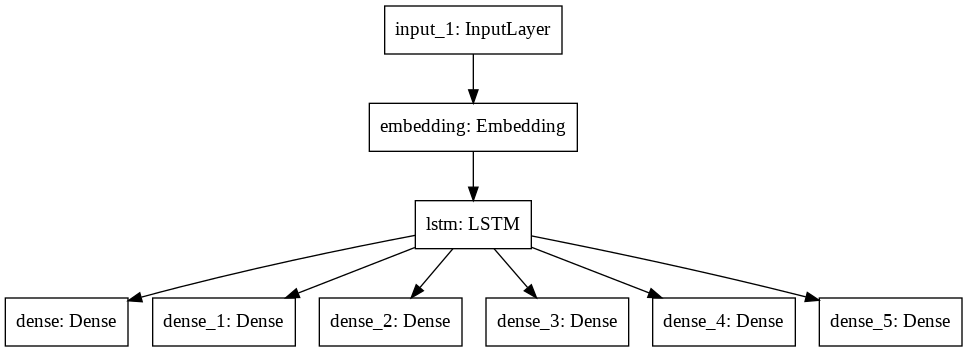

In [30]:
from keras.utils import plot_model
plot_model(model,to_file=path+os.path.join('/model.png'),show_layer_names=True,show_shapes=False)

In [33]:
score = model.evaluate(x=X_test, y=[y1_test, y2_test, y3_test, y4_test, y5_test, y6_test], verbose=1)
print("Test Loss:", round(score[0]*100,2))
print("Test Accuracy:", round(score[1]*100,2))

107/107 [==============================] - 7s 62ms/step - loss: 2.6219 - dense_loss: 0.6720 - dense_1_loss: 0.5950 - dense_2_loss: 0.5867 - dense_3_loss: 0.5623 - dense_4_loss: 0.1356 - dense_5_loss: 0.0703 - dense_acc: 0.5991 - dense_1_acc: 0.7141 - dense_2_acc: 0.7309 - dense_3_acc: 0.7565 - dense_4_acc: 0.9709 - dense_5_acc: 0.9871
Test Loss: 262.19
Test Accuracy: 67.2


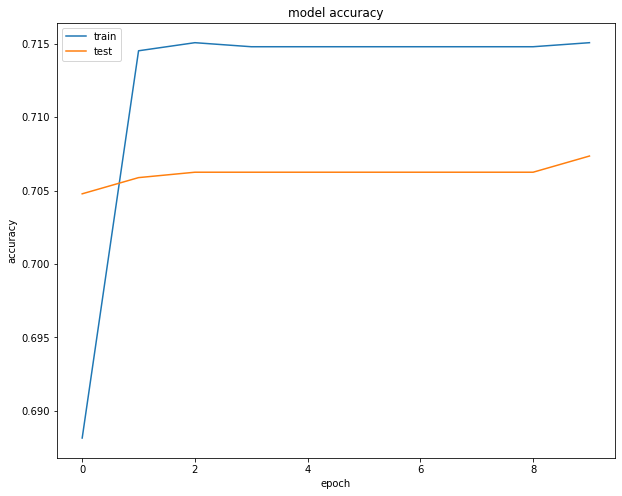

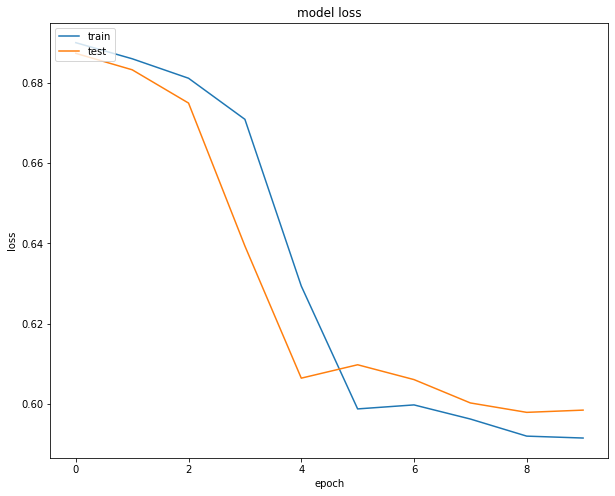

In [40]:
import matplotlib.pyplot as plt
plt.plot(history.history['dense_1_acc'])
plt.plot(history.history['val_dense_1_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.savefig(path+os.path.join('/model-accuracy.png'))
plt.show()
plt.plot(history.history['dense_1_loss'])
plt.plot(history.history['val_dense_1_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.savefig(path+os.path.join('/model-loss.png'))
plt.show()

In [41]:
fp = path+os.path.join('/TEST.csv')
test_script = pd.read_csv(fp)
test_script

,TITLE,ABSTRACT
0,On the wave propagation analysis and supratran...,"In this research, we investigate the nonline..."
1,Thermal and non-thermal emission from the coco...,We present hydrodynamic simulations of the h...
2,HTEM data improve 3D modelling of aquifers in ...,"In Paris Basin, we evaluate how HTEM data co..."
3,Chirality-induced Antisymmetry in Magnetic Dom...,"In chiral magnetic materials, numerous intri..."
4,In-home and remote use of robotic body surroga...,People with profound motor deficits could pe...
...,...,...
3967,Probabilities of causation of climate changes,Multiple changes in Earth's climate system h...
3968,On Estimation of $L_{r}$-Norms in Gaussian Whi...,We provide a complete picture of asymptotica...
3969,Monitoring of Wild Pseudomonas Biofilm Strain ...,The present paper proposes a novel method of...
3970,Self-Motion of the 3-PPPS Parallel Robot with ...,This paper presents the kinematic analysis o...


In [42]:
xTest = []
scripts = list(test_script["ABSTRACT"])
for sen in scripts:
    xTest.append(preprocess_text(sen))
#xTest

In [43]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 200, 100)     4047600     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 128)          117248      embedding[0][0]                  
__________________________________________________________________________________________________
dense (Dense)                   (None, 1)            129         lstm[0][0]                       
_______________________________________________________________________________________

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train2, X_test2, y_train2, y_test2 = train_test_split(df['ABSTRACT'], df.labels, random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train2)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train2)
print(clf.predict(count_vect.transform(["   I870./, want to build an AI system that will calculate statistics, probablity and other shit"])))

['Computer Science']


In [45]:
predictions = []
for line in xTest:
  predictions.append(clf.predict(count_vect.transform([line])))
predictions = pd.DataFrame(predictions)
predictions.columns = ['labels']
predictions.to_csv(path+os.path.join('/output_final.csv'),header=True,index=True)
predictions.head()

,labels
0,Physics
1,Physics
2,Physics
3,Physics
4,Computer Science
